# DAV 6150 Module 3 Assignment - Cleaning “Messy” Data
Ke Chen,  Alejandra Zapata

## 1. Introduction
The wine data set with many of the attributes being related to the chemical composition will be investigated and cleaned in the following work. <br>
<br>
According to the given data set profiling table, total 16 attributes were recorded. The attributes include AcidIndex, Alcohol, Chlorides, CitricAcid, Density, FixedAcidity, FreeSulfurDioxide, LabelAppeal, ResidualSugar, STARS, Sulphates, TotalSulfurDioxide, VolatileAcidity and pH as the explanatory variables. The TARGET will be the response variable. Also the INDEX will be taken as unique ID.<br>
<br>
The data cleaning plan will be summarized as:
- 1. Import the data set and apply exploratory data analysis (EDA). The EDA will mainly focus on detecting the missing values and outliers. 
- 2. Based on the EDA result, investigate the original data set, and apply drop or filling rows and/or columns.
- 3. Create new or transform the attributes if needed based on the EDA.
- 4. Re-run the EDA to ensure the data is well prepared for subsequent modeling.

Before doing the EDA, let's import the original data set in to pandas data frame first.

In [1]:
# import pandas libraries for dataframe loading
import pandas as pd
# read data into dataframe
df=pd.read_csv(r'https://raw.githubusercontent.com/chenkecoco1/DAV-6150/main/M3_Data.csv')
# check loading
df.head()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
1,2,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,4,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,5,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,6,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


## 2. Exploratory Data Analysis

In [2]:
# get the basic data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   INDEX               12795 non-null  int64  
 1   TARGET              12795 non-null  int64  
 2   FixedAcidity        12795 non-null  float64
 3   VolatileAcidity     12795 non-null  float64
 4   CitricAcid          12795 non-null  float64
 5   ResidualSugar       12179 non-null  float64
 6   Chlorides           12157 non-null  float64
 7   FreeSulfurDioxide   12148 non-null  float64
 8   TotalSulfurDioxide  12113 non-null  float64
 9   Density             12795 non-null  float64
 10  pH                  12400 non-null  float64
 11  Sulphates           11585 non-null  float64
 12  Alcohol             12142 non-null  float64
 13  LabelAppeal         12795 non-null  int64  
 14  AcidIndex           12795 non-null  int64  
 15  STARS               9436 non-null   float64
dtypes: f

According to the basic information above, total 12795 records were found in this data set. 4 attributes contain integer data, while the other 12 attributes contain float data. As the non-null values counts are not 12795 in all attributes, there must be missing values in certain columns.

In [3]:
# checking missing values in each column
df.isnull().sum()

INDEX                    0
TARGET                   0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          616
Chlorides              638
FreeSulfurDioxide      647
TotalSulfurDioxide     682
Density                  0
pH                     395
Sulphates             1210
Alcohol                653
LabelAppeal              0
AcidIndex                0
STARS                 3359
dtype: int64

There are 8 attributes containing missing values. They are all float data columns. For intuitively seeing the portion and randomness of the missing values. The bar plot and heatmap could be created as below.

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.698618x0.755)


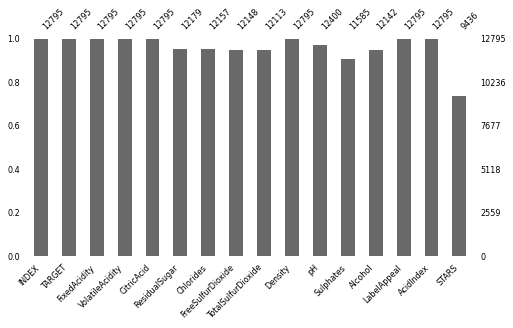

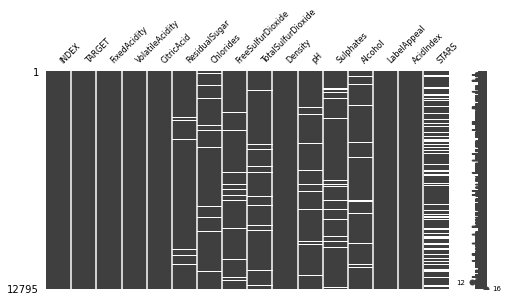

In [4]:
# import msno for cheking missing
import missingno as msno
# plot bar plot of missing values
print (msno.bar(df,figsize=(8, 4), fontsize=8))
# plot box plot of missing values
print (msno.matrix(df,figsize=(8, 4), fontsize=8))

The columns ResidualSugar, Chlorides, FreeSulfurDioxide, TotalSulfurDioxide, pH, Sulphates and Alcohol do not have a small portion of missing values, while attribute STAR contains relatively large portion of missing values, which is almost 25% of the whole column. Also, the heatmap does not show any regular missing data pattern, therefore the missing values could be taken as missing as random. <br><br>
Before taking action with the missing values, the basic descriptive values and attribute pattern of the original dataset need to be checked.

In [5]:
# statistical values
df.describe()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,8069.980305,3.029074,7.075717,0.324104,0.308413,5.418733,0.054822,30.845571,120.714233,0.994203,3.207628,0.527112,10.489236,-0.009066,7.772724,2.041755
std,4656.905107,1.926368,6.317643,0.784014,0.862080,33.749379,0.318467,148.714558,231.913211,0.026538,0.679687,0.932129,3.727819,0.891089,1.323926,0.902540
min,1.000000,0.000000,-18.100000,-2.790000,-3.240000,-127.800000,-1.171000,-555.000000,-823.000000,0.888090,0.480000,-3.130000,-4.700000,-2.000000,4.000000,1.000000
25%,4037.500000,2.000000,5.200000,0.130000,0.030000,-2.000000,-0.031000,0.000000,27.000000,0.987720,2.960000,0.280000,9.000000,-1.000000,7.000000,1.000000
50%,8110.000000,3.000000,6.900000,0.280000,0.310000,3.900000,0.046000,30.000000,123.000000,0.994490,3.200000,0.500000,10.400000,0.000000,8.000000,2.000000
75%,12106.500000,4.000000,9.500000,0.640000,0.580000,15.900000,0.153000,70.000000,208.000000,1.000515,3.470000,0.860000,12.400000,1.000000,8.000000,3.000000
max,16129.000000,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


According to common sense of science, some abnormal values were already seen in the table above. For example:
- The minimum pH is 0.48, which almost reaches sulfuric acid.
- The minimum Alcohol is -4.7%, which does not make sense with the negative value.
- The negative Acidity values, which wants to show Alkalinity?<br>

Therefore, it is very important to have overview of each column and understand the outliers as well. The distribution of each columns will be shown as the following graphs. The INDEX column will not be analyzed as it will not be concluded in the prediction model. The other 3 integer type attributes can also be applied with histograms. The graph will show bar plot shape as the data are discrete.

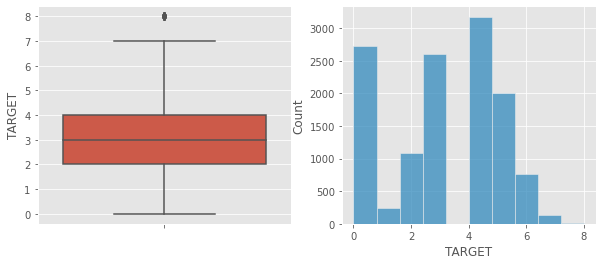

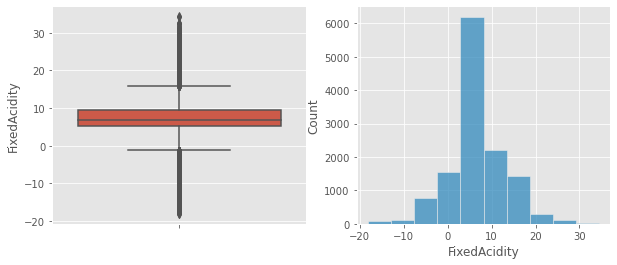

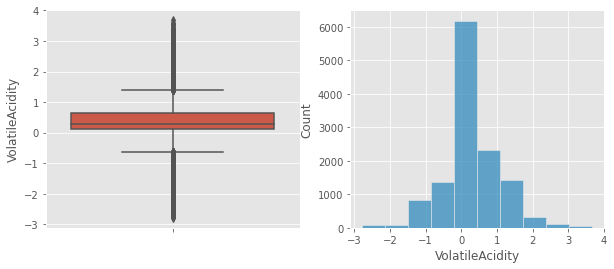

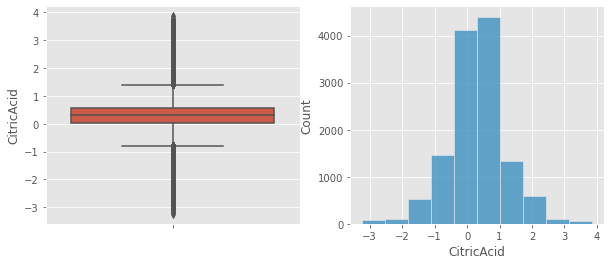

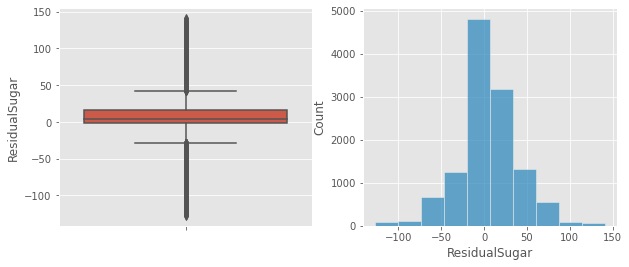

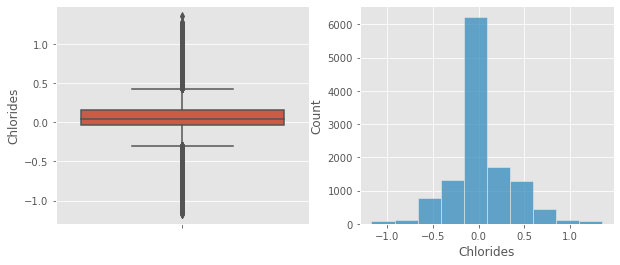

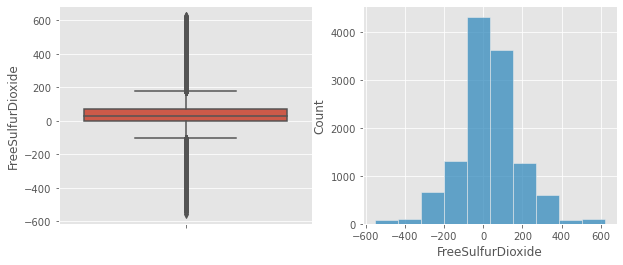

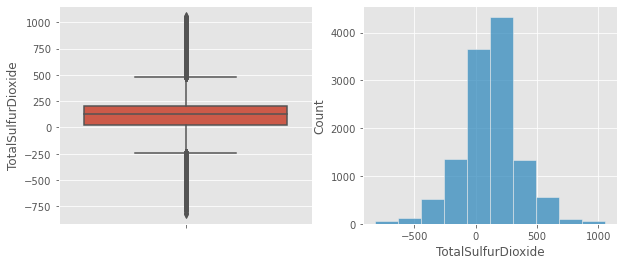

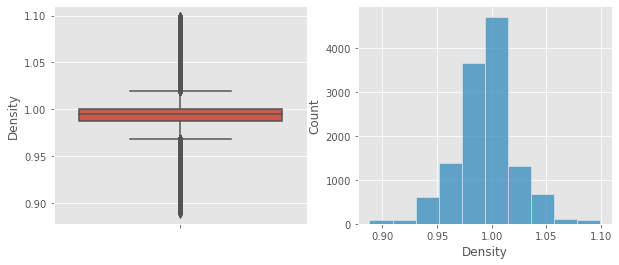

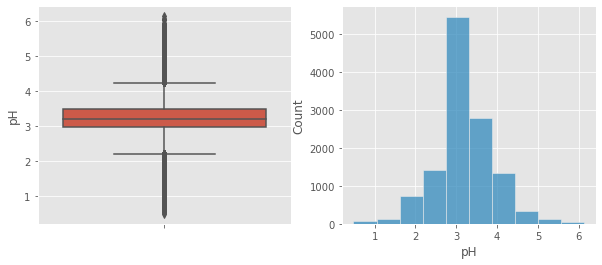

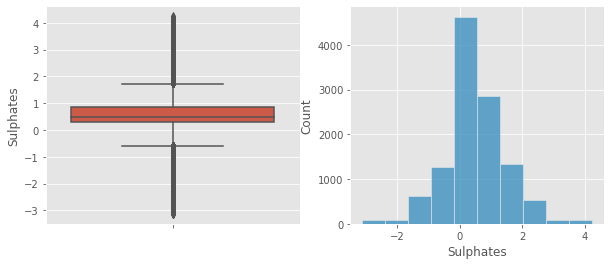

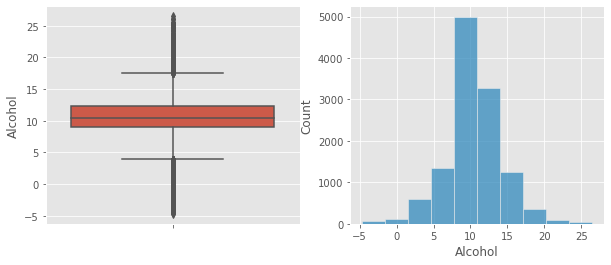

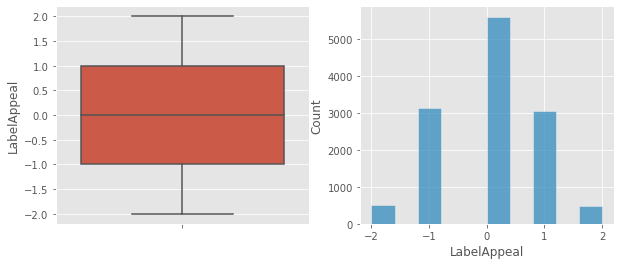

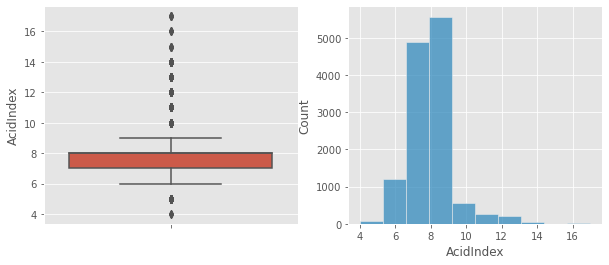

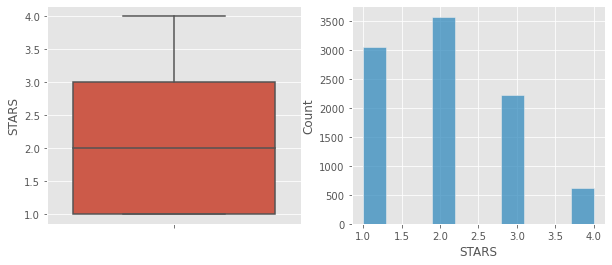

In [6]:
# import libraries for plotting
from string import ascii_letters
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# plot histograms and box plot of each attribute
for i in df.iloc[:,1:].columns:
    fig, axes = plt.subplots(1, 2,figsize=(10,4))
    sns.boxplot(ax=axes[0], y = i, data = df,orient='v')
    sns.histplot(data=df, ax=axes[1], x = i, bins=10)

The continuous variables are mostly showing a symmetric and unimodal distribution, some are centered around 0, which is similar to normal shape. Only AcidIndex is a little bit right skewed. Even though the box plots also show large outlier tails, it may be caused by most values are in the central narrow range, which result a steep shape of the histogram as well. Therefore, the outlier tails evenly appeared on both sides. According to the x-axis tickers, the below zero values are commonly seen, which is conflict with scientific common sense as negative values is meaningless. **Considering the neat shape of the histograms, it is understandable and reasonably suspect the data were log transformed or with specific type of units.** Assuming the data were transformed and/or with meanings, it is better to keep as it is. It is not wise to created more summarized features with the transformed data, such as Total Acidity, since the units are not provided.
<br>
<br>
The integer variables, such as the TARGET, LabelAppeal, AcidIndex and STARS show separate bars, as they are discrete. Here is a special case, the STARS. According to the data profiling information, it is basically for ranking, this column is supposed to be an ordinal categorial data rather than numeric data.
<br>
<br>
In order to look at the linear correlation between each variable, the heatmap will be created. It will benefit to our decision on dealing with the missing values and attributes selection.

AxesSubplot(0.125,0.125;0.62x0.755)


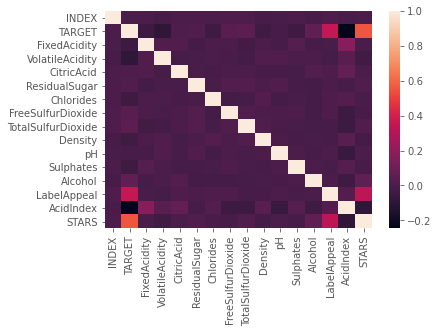

In [7]:
# for importing seaborn
import seaborn as sns
print(sns.heatmap(df.corr()))

Most variables show weak or no linear correlation to each other at all. Only the response variable TARGET and independent variable STARS shows moderate positive correlation. Therefore, STARS needs to be taken as a very important variable in this case.

## 3. Data Preparation
### 3.1 Dropping Columns
Based on the information getting from EDA, the INDEX column could be dropped as it is not related to the model creation. 

In [8]:
# drop the INDEX column
df_new=df.iloc[:,1:]
# check imputation
df_new.head()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
1,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


### 3.2 Imputing Missing Values
The STARS column, which is moderate positively correlated with the response variable TARGET, cannot be arbitrarily deleted or imputed by random. Also, almost 1/4 of the data were missing. Conservatively, we can create a new category for the missing values called 'NO STARS'.

In [9]:
# fill in missing values of STARS column
df_new['STARS']=df_new['STARS'].fillna('No STARS')

For other numeric data, if the missing values are simply imputed with the mean, median or mode, they will be in the largest cluster of center range. To make the imputation more meaningful, the k-nearest neighbors (KNN) algorithm will be applied to impute the missings. Avoiding overfitting and too arbitrary, 5 will be selected as the number of neighbors.

In [10]:
# import library
from sklearn.impute import KNNImputer
# take out the numeric variables
df_numeric=df_new.iloc[:,1:-3]
# set the imputer
imputer = KNNImputer(n_neighbors=5)
# fill in the missings and convert to dataframe again
df_numeric = pd.DataFrame(imputer.fit_transform(df_numeric),columns = df_numeric.columns)
# concatenate the frames into the original shape 
df_filled=pd.concat([df_new.iloc[:,0], df_numeric, df_new.iloc[:,12:]], axis=1)
# sanity check
df_filled.head()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,3,3.2,1.160,-0.98,54.2,-0.567,-9.0,268.0,0.99280,3.33,-0.59,9.90,0,8,2
1,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,12.27,-1,7,3
2,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.00,-1,8,3
3,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.20,-1,6,1
4,4,8.0,0.330,-1.26,9.4,0.099,-167.0,108.0,0.99457,3.12,1.77,13.70,0,9,2


Missing values have been imputed. 

### 3.3 Outliers Checking and Removing
As in the EDA section, the numeric data variables have long tails. The outliers, which are rarely seen and does not contribute too much on the final model as the number of data is fairly unusual, could be removed. But conservatively, 3.5 times standard deviation will be applied as the boundary after testing, for keeping the data amount still over 11000 and reaching the statistical significance.
<br>
<br>
However, as mentioned in the EDA, AcidIndex is right skewed. This variable needs to be normalize transformed before checking and removing the outliers.

In [11]:
# normalize the AcidIndex variable
from sklearn.preprocessing import power_transform
df_filled[['AcidIndex']]=power_transform(df_filled[['AcidIndex']], method='box-cox')

In [12]:
# filter out outliers of each numeric variables and remove them.
df_o_removed=df_filled.iloc[:,:]
for p in ['FixedAcidity','VolatileAcidity','CitricAcid','ResidualSugar','Chlorides','FreeSulfurDioxide','TotalSulfurDioxide','Density','pH','Sulphates','Alcohol','LabelAppeal','AcidIndex']:
    upperlimit=df_o_removed[p].mean()+3.5*df_o_removed[p].std()
    lowerlimit=df_o_removed[p].mean()-3.5*df_o_removed[p].std()
    df_o_removed=df_o_removed[(df_o_removed[p]<upperlimit)&(df_o_removed[p]>lowerlimit)]
df_o_removed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11760 entries, 0 to 12794
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TARGET              11760 non-null  int64  
 1   FixedAcidity        11760 non-null  float64
 2   VolatileAcidity     11760 non-null  float64
 3   CitricAcid          11760 non-null  float64
 4   ResidualSugar       11760 non-null  float64
 5   Chlorides           11760 non-null  float64
 6   FreeSulfurDioxide   11760 non-null  float64
 7   TotalSulfurDioxide  11760 non-null  float64
 8   Density             11760 non-null  float64
 9   pH                  11760 non-null  float64
 10  Sulphates           11760 non-null  float64
 11  Alcohol             11760 non-null  float64
 12  LabelAppeal         11760 non-null  int64  
 13  AcidIndex           11760 non-null  float64
 14  STARS               11760 non-null  object 
dtypes: float64(12), int64(2), object(1)
memory usage: 1.4

### 3.4 Dummy Data Changing
It is the time for dummy encoding the categorical data as categorical data cannot be used directly as numeric data for future model creation.

In [13]:
# get dummy data of the last variable STARS
dum=pd.get_dummies(df_o_removed['STARS'])
dum.columns=['STAR_1', 'STAR_2','STAR_3','STAR_4','No_STARS']
# concate the data frames
df_ready=pd.concat([df_o_removed.iloc[:,1:-1],dum], axis=1)
# sanity check
df_ready.head()

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STAR_1,STAR_2,STAR_3,STAR_4,No_STARS
0,3.2,1.160,-0.98,54.2,-0.567,-9.0,268.0,0.99280,3.33,-0.59,9.90,0,0.362452,0,1,0,0,0
1,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,12.27,-1,-0.545652,0,0,1,0,0
2,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.00,-1,0.362452,0,0,1,0,0
3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.20,-1,-1.790732,1,0,0,0,0
4,8.0,0.330,-1.26,9.4,0.099,-167.0,108.0,0.99457,3.12,1.77,13.70,0,1.051754,0,1,0,0,0


## 4. Prepped Data Review

In [14]:
# checking missing values in each column again
df_ready.isnull().sum()

FixedAcidity          0
VolatileAcidity       0
CitricAcid            0
ResidualSugar         0
Chlorides             0
FreeSulfurDioxide     0
TotalSulfurDioxide    0
Density               0
pH                    0
Sulphates             0
Alcohol               0
LabelAppeal           0
AcidIndex             0
STAR_1                0
STAR_2                0
STAR_3                0
STAR_4                0
No_STARS              0
dtype: int64

No missing value found.

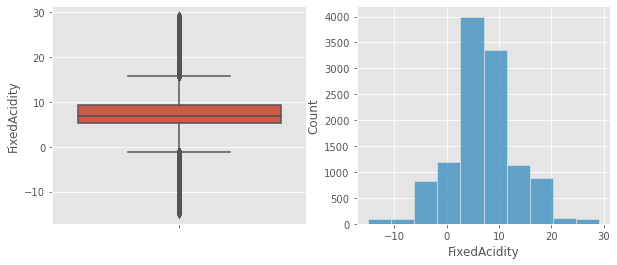

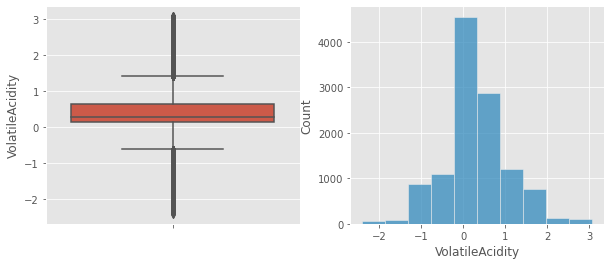

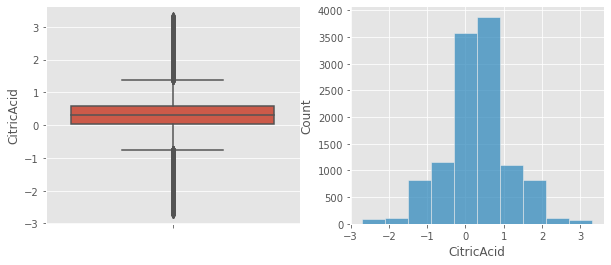

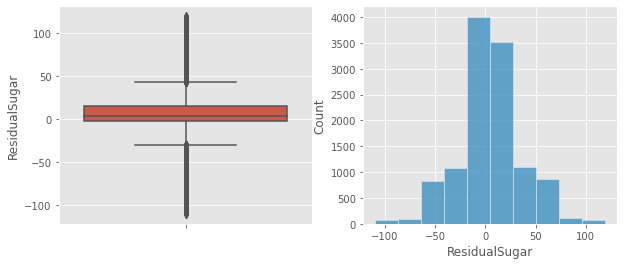

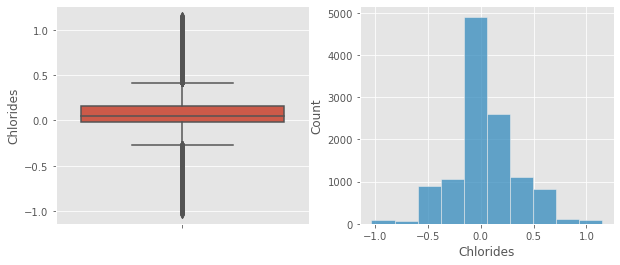

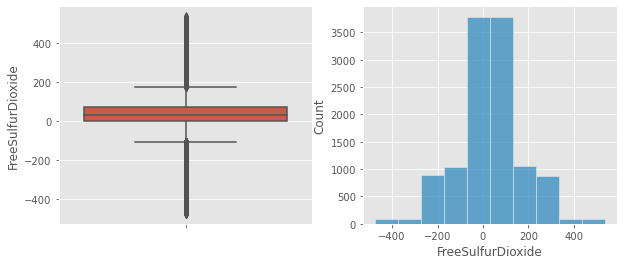

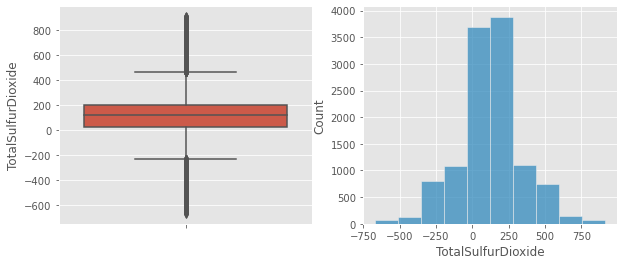

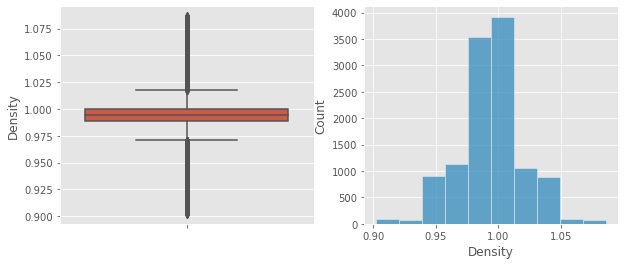

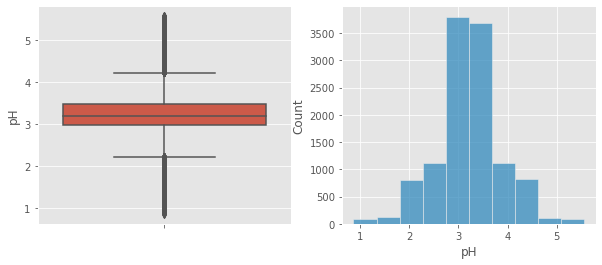

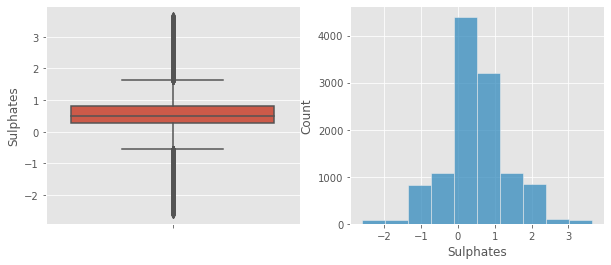

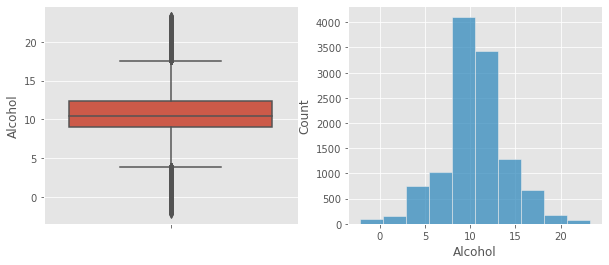

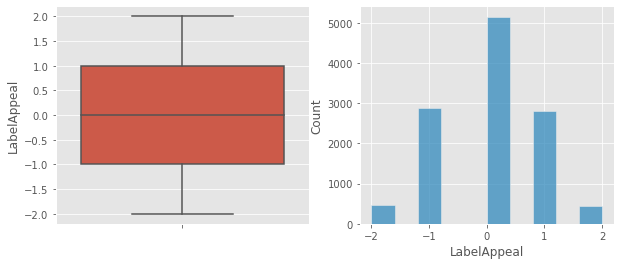

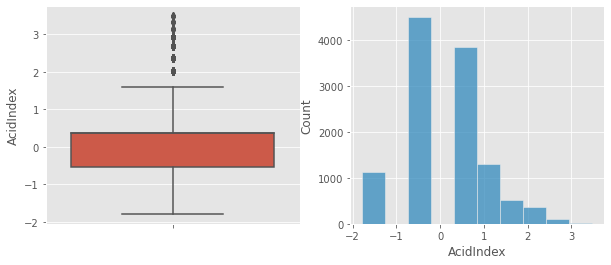

In [15]:
# plotting the manipulated numeric data again
for i in df_ready.iloc[:,:13].columns:
    fig, axes = plt.subplots(1, 2,figsize=(10,4))
    sns.boxplot(ax=axes[0], y = i, data = df_ready,orient='v')
    sns.histplot(data=df_ready, ax=axes[1], x = i, bins=10)

 The variable AcidIndex has some change than before. The overall shape is getting closer to the center. 

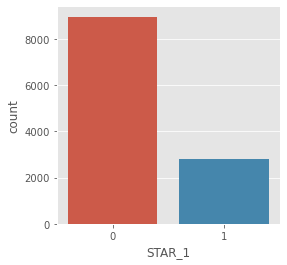

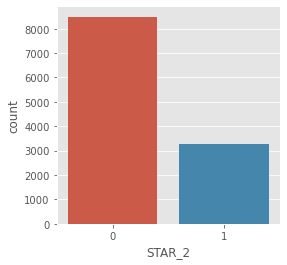

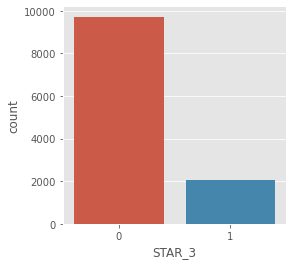

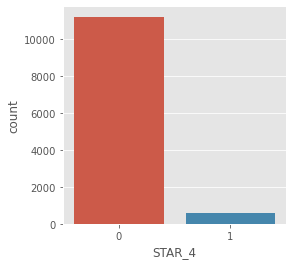

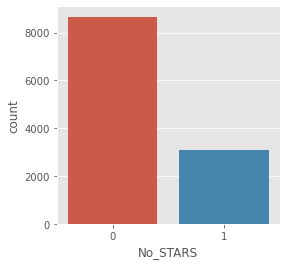

In [16]:
# ploting the dummied catergorical variable
for i in df_ready.iloc[:,13:18].columns:
    fig, axes = plt.subplots(1, 1,figsize=(4,4))
    ax = sns.countplot(x= i, data=df_ready)

Although we separated the 'STARTS' variable into different dummy variables, we were able to maintain the proportion of data with 1,2,3,4 and NO STARS. Now our categorical data is ready to use one machine learning algorithms.

## 5. Conclusions

By obtaining the domain knowledge we were able to understand that some of the values may not be scientifically accurate. As a team, we decided to use the assumption that the data was previously transformed to have a bell-shaped distribution and decided to use strategy that would allow us to maintain the size and shape of the data. We understood the data set describes the chemical composition of different wines and their quality and believe the prepared data set could be used for as a data model.

Using KNN we were able to fill in the missing values without biasing the data by increasing the values that equal the mean, median or mode. By running the appropriate EDA, we were able to assume that the data was previously transformed to have a symmetrical distribution but because it was strongly unimodal it was important to consider the existing distribution to maintain a useful dataset without strengthening the node of the distribution.

We also removed any values 3.5 std away from the mean and were able to keep a model with a sample size statistically significant. We applied feature engineering to create additional dummy variables that will be useful in predictive modeling. Our data set is now ready for machine learning algorithms.


### References
https://www.extension.iastate.edu/wine/total-sulfur-dioxide-why-it-matters-too<br>
http://srjcstaff.santarosa.edu/~jhenderson/Sulfur%20Dioxide.pdf<br>
https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e<br>
https://stackoverflow.com/questions/50929181/get-dummies-for-ordinal-variables-and-change-column-names-automatically<br>
https://stats.stackexchange.com/questions/195246/how-to-handle-ordinal-categorical-variable-as-independent-variable<br>
https://www.youtube.com/watch?v=KFuEAGR3HS4<br>
